<a href="https://colab.research.google.com/github/mrrajeev29/Titanic-Dataset-Machine-Learning/blob/main/FINAL_COLAB_ON_TITANIC_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import copy, math
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
data1 = '/content/drive/MyDrive/GOOGLE COLAB/titanic.csv'
titanic = pd.read_csv(data1)

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/GOOGLE COLAB/train.csv")

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/GOOGLE COLAB/test.csv")

In [ ]:
print("Train coloumns: ", train.columns.tolist)

Train coloumns:  <bound method IndexOpsMixin.tolist of Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')>


In [ ]:
print("Test columns: ", test.columns.tolist)

Test columns:  <bound method IndexOpsMixin.tolist of Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')>


In [ ]:
# load the data
train_data = pd.read_csv('/content/drive/MyDrive/GOOGLE COLAB/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/GOOGLE COLAB/tested.csv.xls')

# preprocess the data for train dataset

train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train_data = train_data.dropna()
train_data['Sex'] = train_data['Sex'].map({'female': 1, 'male': 0}).astype(int)
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
X_train = train_data.drop(['Survived'], axis=1)
y_train = train_data['Survived']

# preprocess the data for test dataset

test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.dropna()
test_data['Sex'] = test_data['Sex'].map({'female': 1, 'male': 0}).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
X_test = test_data.drop(['Survived'], axis=1)
y_test = test_data['Survived']

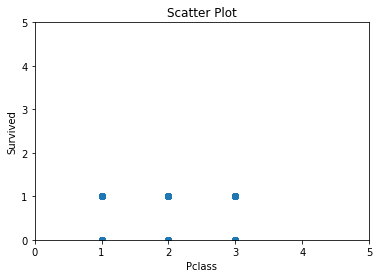

In [ ]:
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.scatter(train.Pclass, train.Survived)
plt.title("Scatter Plot")
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.show()

In [ ]:
# Load the Titanic dataset
data = pd.read_csv('/content/drive/MyDrive/GOOGLE COLAB/titanic.csv')

# Preprocess the data by removing unnecessary features and handling missing values
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)

# Separate the independent and dependent variables
X = data.drop('Survived', axis=1)
y = data['Survived']

# Set the number of features in the dataset (excluding the target variable)
num_features = X.shape[1]

# Initialize the weight vector with random values drawn from a normal distribution
w = np.array(np.random.normal(size=num_features))

# Initialize the bias term with a small random value
b = np.random.normal(size=1)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def compute_cost(X, y, w, b):
    m = len(y)
    y_pred = sigmoid(np.dot(X, w) + b)
    cost = -1/m * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
    return cost

In [ ]:
def compute_cost_test(X_test, y_test, w, b):
    m = len(y_test)
    f_wb = sigmoid(np.dot(X_test, w) + b)
    cost = -1/m * np.sum(y_test * np.log(f_wb) + (1-y_test) * np.log(1-f_wb))
    return cost

In [ ]:
def compute_gradient(X, y, w, b):
    m = len(y)
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    gradient_w = 1/m * np.dot(X.T, f_wb - y)
    gradient_b = 1/m * np.sum(f_wb - y)
    return gradient_w, gradient_b

In [ ]:
def compute_gradient_descent(X, y, w, b, learning_rate, num_iterations):
    costs = []
    for i in range(num_iterations):
        
        # compute the gradient

        gradient_w, gradient_b = compute_gradient(X, y, w, b)

        # update the weights and bias

        w -= learning_rate * gradient_w
        b -= learning_rate * gradient_b
        
        # compute the cost and append it to the list of costs
        
        cost = compute_cost(X, y, w, b)
        costs.append(cost)
    
    w_optimized = w
    b_optimized = b

    return w_optimized, b_optimized, costs

In [ ]:
# initialize the weights and bias

w = np.random.randn(X_train.shape[1])
b = np.random.randn()

In [ ]:
# perform gradient descent

w_optimized, b_optimized, costs = compute_gradient_descent(X_train, y_train, w, b, 0.01, 1000)

<ipython-input-64-42ded5b7a316>:4: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))


In [ ]:
# compute the training and test set accuracies

y_train_pred = sigmoid(np.dot(X_train, w_optimized) + b_optimized)
y_train_pred = np.round(y_train_pred)
train_accuracy = np.mean(y_train_pred == y_train)

y_test_pred = sigmoid(np.dot(X_test, w_optimized) + b_optimized)
y_test_pred = np.round(y_test_pred)
test_accuracy = np.mean(y_test_pred == y_test)

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)

Training set accuracy: 0.5955056179775281
Test set accuracy: 0.6163141993957704
